In [9]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.utils.multiclass import unique_labels
import torchvision
import torchvision.transforms as transforms
from latexify import latexify
%matplotlib inline

In [3]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load MNIST dataset using torchvision
train_dataset = torchvision.datasets.MNIST(root='../datasets', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='../datasets', train=False, download=True, transform=transform)

In [7]:
# Flatten the images for sklearn MLP
X_train = train_dataset.data.numpy().reshape((len(train_dataset), -1))
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape((len(test_dataset), -1))
y_test = test_dataset.targets.numpy()

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

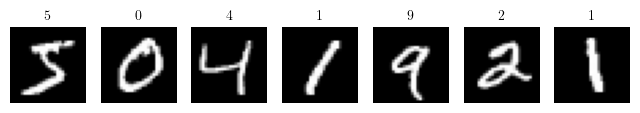

In [13]:
# Plot few images
latexify()
fig, axs = plt.subplots(1, 7, figsize=(8, 10))
for i in range(7):
    axs[i].imshow(X_train[i].reshape((28, 28)), cmap='gray')
    axs[i].set_title(y_train[i])
    axs[i].axis('off')

In [15]:
# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_probabilities = mlp_model.predict_proba(X_test_scaled)

# Predict on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9735


c:\Users\ryees\anaconda3\envs\pml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


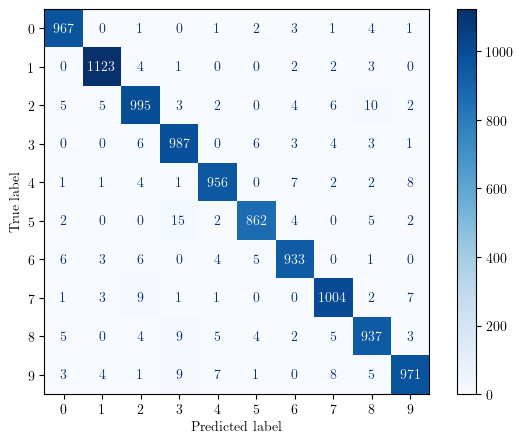

In [19]:
# Display the confusion matrix
latexify(fig_width=7, fig_height=5)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(values_format='d', cmap='Blues')
plt.show()

In [20]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



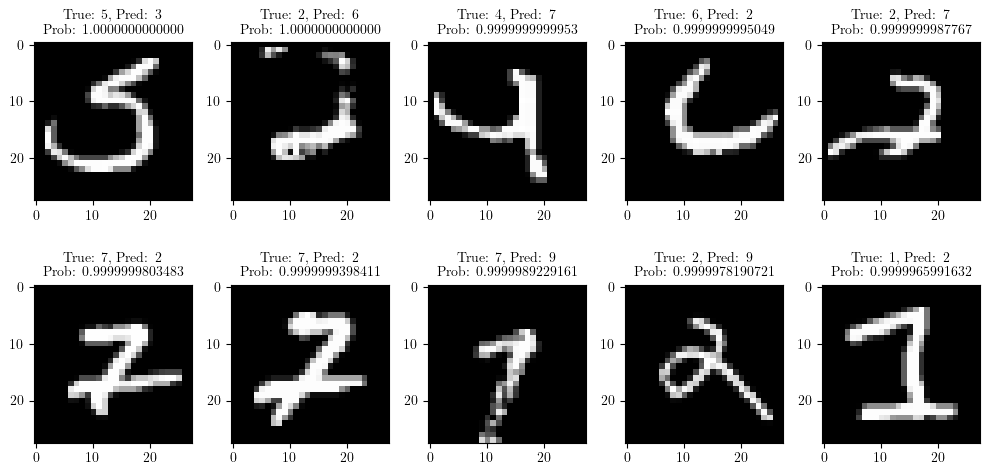

In [21]:
# Display the first k wrong classified images with highest probabilities

# Find indices of wrongly classified samples
wrong_indices = np.where(y_pred != y_test)[0]

# Sort wrong predictions by highest class probability
sorted_indices = np.argsort(np.max(y_probabilities[wrong_indices], axis=1))[::-1]

k = 10
latexify(fig_width=10, fig_height=5)
for i, idx in enumerate(sorted_indices[:k]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_dataset[wrong_indices[idx]][0].numpy().squeeze(), cmap='gray')
    plt.title(f'True: {y_test[wrong_indices[idx]]}, Pred: {y_pred[wrong_indices[idx]]}\nProb: {np.max(y_probabilities[wrong_indices[idx]]):.13f}')

plt.tight_layout()
plt.show()